# Alunos: Keiya Nishio e Karen Nishio

# Projeto Web Scrapper

## Descrição
Este projeto tem como objetivo realizar um Web Scraping na página dos top 250 melhores filmes de acordo com o IMDB, uma das fontes mais confiáveis para avaliação cinematográfica. Utilizando técnicas de Web Scraping, os dados essenciais sobre cada filme, como título, ano de lançamento, classificação, nota de avaliação e duração, serão extraídos de forma automatizada.

Uma vez que os dados são coletados, eles serão submetidos a uma análise. Serão criados gráficos e visualizações que permitirão uma compreensão mais clara das tendências e padrões dentro da lista dos melhores filmes.

## Ferramentas
- Beautiful Soup
- Pandas

## Página IMDB
- https://m.imdb.com/chart/top/


## Instalando as o Beautiful Soup

In [ ]:
!pip install -U BeautifulSoup4

## Importanto as bibliotecas

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Definindo o link do site para obter os dados

In [ ]:
url = 'https://m.imdb.com/chart/top/'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

response = requests.get(url, headers=headers)


## Coleta de dados

### Títulos dos filmes

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')
movies_titles = soup.find_all('h3', class_='ipc-title__text')
movies = []
for movie in movies_titles:
    movie_text = movie.get_text().replace('\n', "").strip(" ")
    if movie_text[0].isdigit():
        movies.append(movie_text)
movies

In [ ]:
movies = [movie.split('. ')[1] for movie in movies]

### As notas de avaliações de cada filme

In [ ]:
rating_span = soup.find_all('span', class_='ipc-rating-star--imdb')
ratings_list = []

for span in rating_span:
    rating_text = span.get_text()
    rating_match = re.search(r'(\d+\.\d+)', rating_text)
    if rating_match:
        rating = rating_match.group(0)
        ratings_list.append(rating)
    else:
        print("Nota do IMDb não encontrada")

if not ratings_list:
    print("Elemento de avaliação IMDb não encontrado")

print(ratings_list)

### Ano do lançamento

In [ ]:
years = soup.find_all('span', class_='sc-b189961a-8 kLaxqf cli-title-metadata-item')
year_list = []

for year in years:
    year_text = year.get_text()
    year_match = re.search(r'(\d+\d+\d+\d+)', year_text)
    if year_match:
        ano = year_match.group(0)
        year_list.append(ano)

year_list

## Duração dos filmes

In [ ]:
durations = soup.find_all('span', class_='sc-b189961a-8 kLaxqf cli-title-metadata-item')
duration_list = []

for duration in durations:
    duration_text = duration.get_text()
    duration_match = re.search(r'(\d+h \d+m)', duration_text)
    duration_match_hour = re.search(r'(\d+h)', duration_text)
    duration_match_min = re.search(r'(\d+m)', duration_text)
    if duration_match:
        duracao = duration_match.group(0)
        duration_list.append(duracao)
    elif duration_match_hour:
        duracao = duration_match_hour.group(0)
        duration_list.append(duracao)
    elif duration_match_min:
        duracao = duration_match_min.group(0)
        duration_list.append(duracao)

duration_list

In [ ]:
def convert_to_min(duration):
    if "h" not in duration:
        duration = duration.replace('m', '')
        return int(duration)

    duration = duration.replace(' ', '')
    hours = re.search(r'(\d+h)', duration)
    hours = int(hours.group(0).replace('h', '')) if hours else 0
    minutes = re.search(r'(\d+m)', duration)
    minutes = int(minutes.group(0).replace('m', '')) if minutes else 0
    minutes += hours * 60
    return minutes



duration_list_min = [convert_to_min(duration) for duration in duration_list]

duration_list_min

### Classificação

In [ ]:
classifications = soup.find_all('span', class_='sc-b189961a-8 kLaxqf cli-title-metadata-item')
cls_list = []

for cls in classifications:
    cls_text = cls.get_text()
    cls_match = re.search(r'^[A-Za-z]*[A-Za-z][A-Za-z0-9-. _]*$', cls_text)
    if cls_match:
        classification = cls_match.group(0)
        cls_list.append(classification)

# Adiciona classificação em filmes sem classificação
cls_list.insert(57, "PG")
cls_list.insert(77, "R")
cls_list.insert(83, "PG-13")
cls_list

## Criando o banco de dados

In [ ]:
df = pd.DataFrame()
df['Title'] = movies
df['Ratings'] = ratings_list
df['Year'] = year_list
df['Duration (Minutes)'] = duration_list_min
df['Classification'] = cls_list
# Criando uma nova coluna para representar a década
df['Ratings'] = df['Ratings'].astype(float)
df['Year'] = df['Year'].astype(int)
df['Decade'] = df['Year'] // 10 * 10
df

In [ ]:
df.to_csv("imdb.csv")

## Análise dos dados

### Análise iniciais
Os resultados iniciais incluem as seguintes estatísticas nas colunas numéricas: média, mínimo e máximo.

In [45]:
media_notas = df['Ratings'].mean()
print("Média da coluna 'Ratings':", media_notas)

menor_nota = df['Ratings'].min()
print("Menor valor na coluna 'Ratings':", menor_nota)

maior_nota = df['Ratings'].max()
print("Maior valor na coluna 'Ratings':", maior_nota)

Média da coluna 'Ratings': 8.309600000000001
Menor valor na coluna 'Ratings': 8.0
Maior valor na coluna 'Ratings': 9.3


In [46]:
media_minutos = df['Duration (Minutes)'].mean()
print("Média da coluna 'Duration (Minutes)':", media_minutos)

menor_minutos = df['Duration (Minutes)'].min()
print("Menor valor na coluna 'Duration (Minutes)':", menor_minutos)

maior_minutos = df['Duration (Minutes)'].max()
print("Maior valor na coluna 'Duration (Minutes)':", maior_minutos)

Média da coluna 'Duration (Minutes)': 130.768
Menor valor na coluna 'Duration (Minutes)': 45
Maior valor na coluna 'Duration (Minutes)': 321


In [47]:
media_ano = df['Year'].mean()
print("Média da coluna 'Year':", media_ano)

menor_ano = df['Year'].min()
print("Menor valor na coluna 'Year':", menor_ano)

maior_ano = df['Year'].max()
print("Maior valor na coluna 'Year':", maior_ano)

Média da coluna 'Year': 1987.576
Menor valor na coluna 'Year': 1921
Maior valor na coluna 'Year': 2024


### Análises Aprofundadas
 Aqui é realizada análises com gráficos e números.

#### Quantidade de filmes por Década

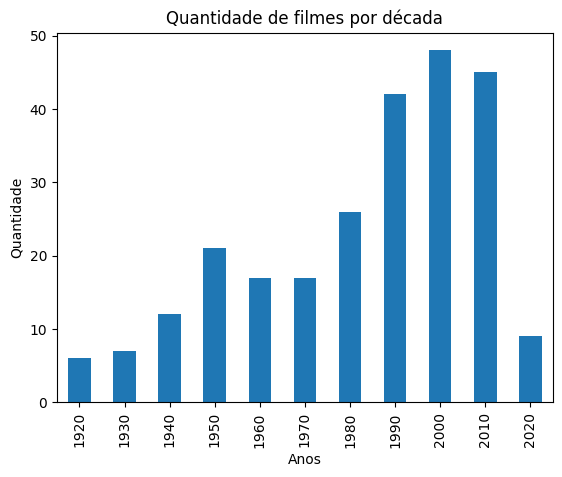

In [48]:
contagem_decadas = df['Decade'].value_counts()
contagem_decadas = contagem_decadas.sort_index()
contagem_decadas.plot(kind='bar')

plt.xlabel('Anos')
plt.ylabel('Quantidade')
plt.title('Quantidade de filmes por década')
plt.show()

#### Contagem anual

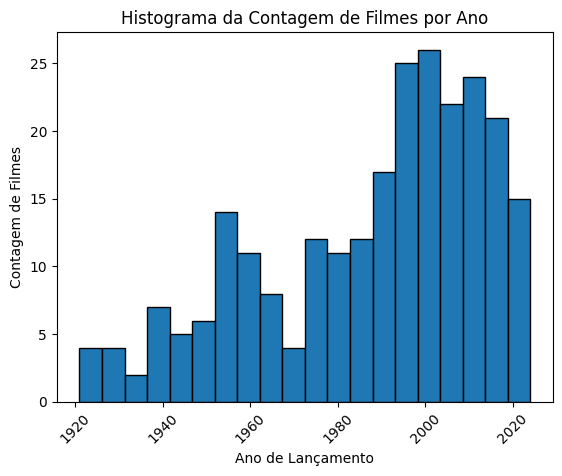

In [49]:
contagem_filmes_por_ano = df['Year'].value_counts().sort_index()


plt.hist(df['Year'], bins=20, edgecolor='black')
plt.title('Histograma da Contagem de Filmes por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Contagem de Filmes')
plt.xticks(rotation=45)
plt.show()

In [50]:
contagem_filmes_por_ano = df['Year'].value_counts()

print(contagem_filmes_por_ano)

Year
1995    8
2004    7
1999    6
1957    6
2019    6
       ..
1941    1
1927    1
1944    1
1958    1
1934    1
Name: count, Length: 87, dtype: int64


In [51]:
contagem_filmes_por_ano = df['Year'].value_counts()


ano_com_mais_filmes = contagem_filmes_por_ano.idxmax()
quantidade_filmes = contagem_filmes_por_ano.max()

print("Ano com mais filmes:", ano_com_mais_filmes)
print("Quantidade de filmes:", quantidade_filmes)

Ano com mais filmes: 1995
Quantidade de filmes: 8


In [52]:
filmes_de_1995 = df[df['Year'] == 1995]

print(filmes_de_1995)

                  Title  Ratings  Year  Duration (Minutes) Classification  \
18                Se7en      8.6  1995                 127              R   
45   The Usual Suspects      8.5  1995                 106              R   
76            Toy Story      8.3  1995                  81              G   
79           Braveheart      8.3  1995                 178              R   
110                Heat      8.3  1995                 170              R   
141              Casino      8.2  1995                 178              R   
184      Before Sunrise      8.1  1995                 101              R   
220            La haine      8.1  1995                  98      Not Rated   

     Decade Duration Category  
18     1990           120-150  
45     1990            90-120  
76     1990             60-90  
79     1990           150-180  
110    1990           150-180  
141    1990           150-180  
184    1990            90-120  
220    1990            90-120  


Os gráficos acima demonstram que, a partir dos anos 80, houve uma produção significativa de grandes filmes, como "Star Wars" e "De Volta para o Futuro". Um ponto interessante a mencionar é que os anos 2000 foram a década em que foram lançados os melhores filmes, de acordo com o IMDB.

Além disso, 1995 foi o ano com mais filmes de sucesso, incluindo "Se7en" e "Toy Story".

#### Duração dos filmes em minutos

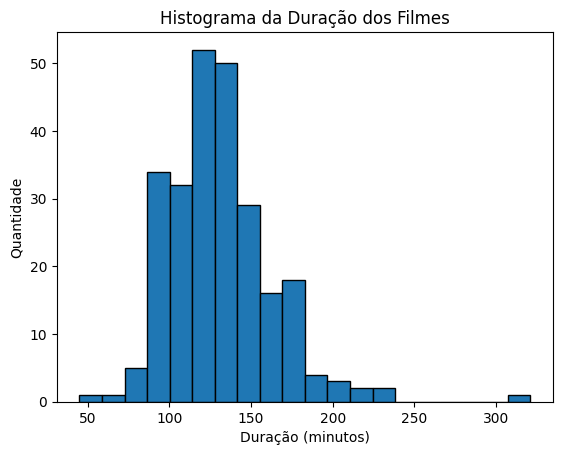

In [53]:
plt.hist(df['Duration (Minutes)'], bins=20, edgecolor='black')
plt.title('Histograma da Duração dos Filmes')
plt.xlabel('Duração (minutos)')
plt.ylabel('Quantidade')
plt.show()

A maioria dos filmes tem entre 100 a 150 minutos de duração.

#### Notas de Avaliação

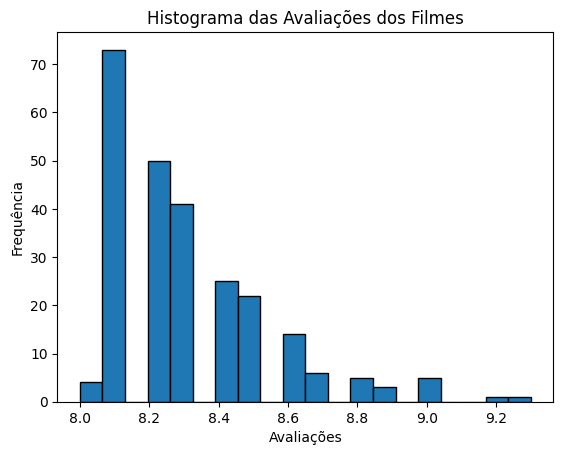

In [54]:
plt.hist(df['Ratings'], bins=20, edgecolor='black')
plt.title('Histograma das Avaliações dos Filmes')
plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.show()

#### Classificação

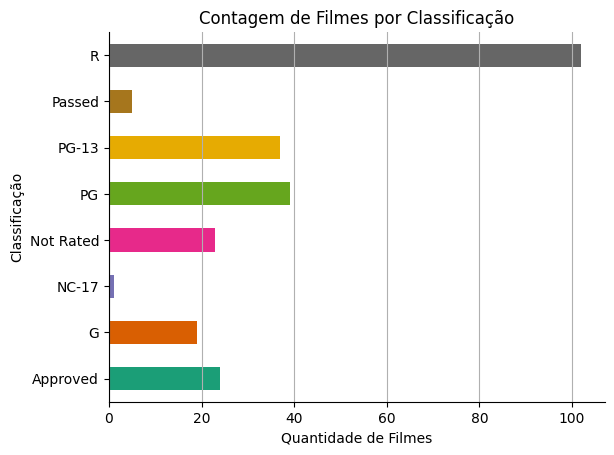

In [55]:
contagem_classification = df['Classification'].value_counts().sort_index()
contagem_classification.plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Contagem de Filmes por Classificação')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Classificação')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(axis='x')

plt.show()

#### Década x Notas de avaliações

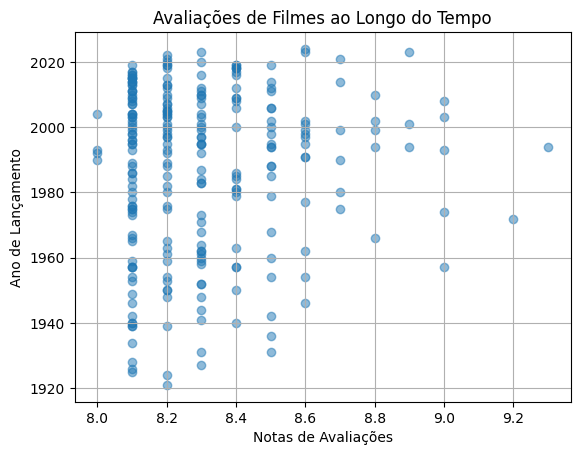

In [56]:
plt.scatter(df['Ratings'], df['Year'], alpha=0.5)
plt.title('Avaliações de Filmes ao Longo do Tempo')
plt.xlabel('Notas de Avaliações')
plt.ylabel('Ano de Lançamento')
plt.grid(True)
plt.show()

In [57]:
media_notas_por_decada = df.groupby('Decade')['Ratings'].mean()

print("Média das notas por década:")
print(media_notas_por_decada)



Média das notas por década:
Decade
1920    8.166667
1930    8.257143
1940    8.258333
1950    8.290476
1960    8.323529
1970    8.358824
1980    8.288462
1990    8.383333
2000    8.304167
2010    8.257778
2020    8.444444
Name: Ratings, dtype: float64


In [58]:
contagem_filmes_por_decada = df['Decade'].value_counts()

print(contagem_filmes_por_decada)


Decade
2000    48
2010    45
1990    42
1980    26
1950    21
1970    17
1960    17
1940    12
2020     9
1930     7
1920     6
Name: count, dtype: int64


In [59]:
decadas_com_10_filmes_ou_mais = contagem_filmes_por_decada[contagem_filmes_por_decada >= 10].index

df_filtrado = df[df['Decade'].isin(decadas_com_10_filmes_ou_mais)]

media_avaliacoes_por_decada = df_filtrado.groupby('Decade')['Ratings'].mean()

print(media_avaliacoes_por_decada)

Decade
1940    8.258333
1950    8.290476
1960    8.323529
1970    8.358824
1980    8.288462
1990    8.383333
2000    8.304167
2010    8.257778
Name: Ratings, dtype: float64


Foi realizada uma análise para determinar qual década obteve a maior média de avaliações de filmes. Na primeira análise, o resultado apontou para os anos 2020. No entanto, essa década apresenta uma pequena quantidade de filmes. Para corrigir essa discrepância, aplicou-se um filtro que elimina décadas com menos de 10 filmes. Com esse ajuste, a década de 90 apresenta a maior média, com uma nota de 8.38.

#### Notas de avaliação x Duração

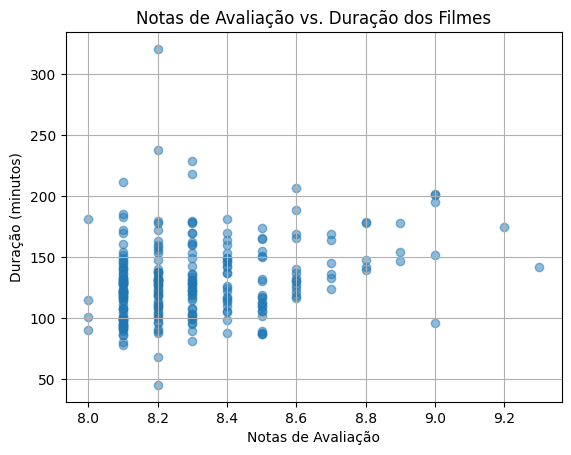

In [60]:
plt.scatter(df['Ratings'], df['Duration (Minutes)'], alpha=0.5)
plt.title('Notas de Avaliação vs. Duração dos Filmes')
plt.xlabel('Notas de Avaliação')
plt.ylabel('Duração (minutos)')
plt.grid(True)
plt.show()

O gráfico acima mostra que a maioria dos filmes têm entre 100 e 200 minutos de duração, indicando que não é necessário um filme ser muito longo para alcançar sucesso.

#### Duração x Ano




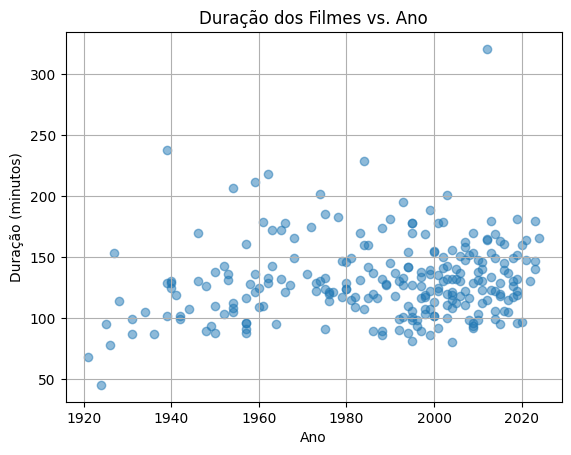

In [61]:
plt.scatter(df['Year'], df['Duration (Minutes)'], alpha=0.5)
plt.title('Duração dos Filmes vs. Ano')
plt.xlabel('Ano')
plt.ylabel('Duração (minutos)')
plt.grid(True)
plt.show()

Os filmes mais antigos, especialmente nos anos 20, tinham uma duração mais curta. A partir dos anos 40, os filmes começaram a apresentar a duração média das obras atuais.

#### Classificação x Década

<Figure size 1400x800 with 0 Axes>

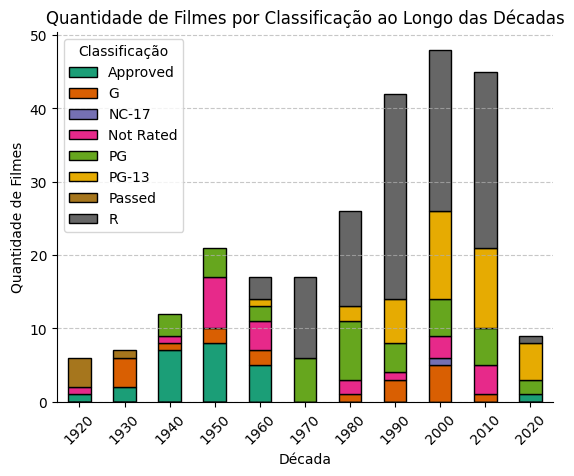

In [62]:
contagem_classificacao_ano = df.groupby(['Decade', 'Classification']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
contagem_classificacao_ano.plot(kind='bar', stacked=True, colormap='Dark2', edgecolor='black')

plt.title('Quantidade de Filmes por Classificação ao Longo das Décadas')
plt.xlabel('Década')
plt.ylabel('Quantidade de Filmes')
plt.legend(title='Classificação')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

O gráfico mostra que, dos anos 20 aos anos 60, a maioria dos filmes era mais acessível ao público geral. No entanto, os filmes mais recentes têm uma classificação mais restrita (R), que no Brasil equivale à classificação para maiores de 16 anos.

#### Classificação x Notas de avaliação

<Figure size 1400x800 with 0 Axes>

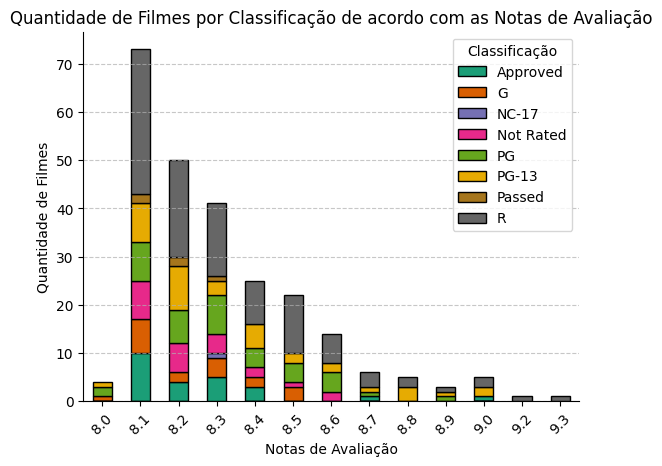

In [63]:
contagem_classificacao_ano = df.groupby(['Ratings', 'Classification']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
contagem_classificacao_ano.plot(kind='bar', stacked=True, colormap='Dark2', edgecolor='black')

plt.title('Quantidade de Filmes por Classificação de acordo com as Notas de Avaliação')
plt.xlabel('Notas de Avaliação')
plt.ylabel('Quantidade de Filmes')
plt.legend(title='Classificação')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

Podemos perceber que os filmes classificados como 'R' são os mais bem-sucedidos por conta da sua quantiade e também por notas de avaliação.

#### Classificação x Duração

<Figure size 1400x800 with 0 Axes>

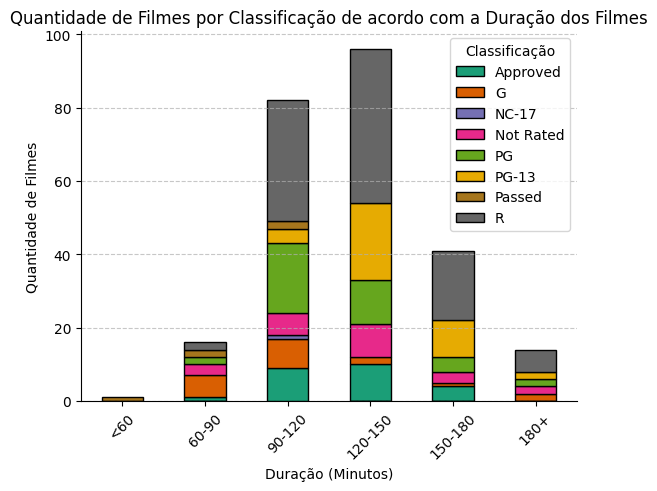

In [64]:
bins = [0, 60, 90, 120, 150, 180, float('inf')]
labels = ['<60', '60-90', '90-120', '120-150', '150-180', '180+']
df['Duration Category'] = pd.cut(df['Duration (Minutes)'], bins=bins, labels=labels)

# Calcular a contagem de filmes por faixa de duração e classificação
contagem_classificacao_duracao = df.groupby(['Duration Category', 'Classification']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
contagem_classificacao_duracao.plot(kind='bar', stacked=True, colormap='Dark2', edgecolor='black')

plt.title('Quantidade de Filmes por Classificação de acordo com a Duração dos Filmes')
plt.xlabel('Duração (Minutos)')
plt.ylabel('Quantidade de Filmes')
plt.legend(title='Classificação')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

O gráfico demonstra que filmes com duração superior a 90 minutos têm mais classificações 'R', ou seja, são mais restritos em termos de faixa etária.

#### Curisosidades


##### Filme mais longo

In [65]:
filme_mais_longo = df[df['Duration (Minutes)'] == df['Duration (Minutes)'].max()]
print("Filme mais longo:")
print("Title:", filme_mais_longo['Title'].iloc[0])
print("Duração:", filme_mais_longo['Duration (Minutes)'].iloc[0], "minutos")


Filme mais longo:
Title: Gangs of Wasseypur
Duração: 321 minutos


##### Filme mais curto

In [66]:
filme_mais_curto = df[df['Duration (Minutes)'] == df['Duration (Minutes)'].min()]
print("Filme mais curto:")
print("Title:", filme_mais_curto['Title'].iloc[0])
print("Duração:", filme_mais_curto['Duration (Minutes)'].iloc[0], "minutos")


Filme mais curto:
Title: Sherlock Jr.
Duração: 45 minutos


##### Filme com a maior avaliação

In [67]:
filme_melhor_avaliado = df[df['Ratings'] == df['Ratings'].max()]
print("Filme melhor avaliado:")
print("Title:", filme_melhor_avaliado['Title'].iloc[0])
print("Avaliação:", filme_melhor_avaliado['Ratings'].iloc[0])


Filme melhor avaliado:
Title: The Shawshank Redemption
Avaliação: 9.3


Filme com a pior avaliação

In [68]:
filme_pior_avaliado = df[df['Ratings'] == df['Ratings'].min()]
print("Filme pior avaliado:")
print("Title:", filme_pior_avaliado['Title'].iloc[0])
print("Avaliação:", filme_pior_avaliado['Ratings'].iloc[0])


Filme pior avaliado:
Title: The Incredibles
Avaliação: 8.0


##### Filme mais antigo

In [69]:
filme_mais_antigo = df[df['Year'] == df['Year'].min()]
print("Filme mais antigo:")
print("Title:", filme_mais_antigo['Title'].iloc[0])
print("Ano:", filme_mais_antigo['Year'].iloc[0])


Filme mais antigo:
Title: The Kid
Ano: 1921


##### Filme mais novo

In [70]:
filme_mais_novo = df[df['Year'] == df['Year'].max()]
print("Filme mais novo:")
print("Title:", filme_mais_novo['Title'].iloc[0])
print("Ano:", filme_mais_novo['Year'].iloc[0])


Filme mais novo:
Title: Dune: Part Two
Ano: 2024
